<a href="https://colab.research.google.com/github/Cavalheiro93/mvp-data-analyst-global-ai-market/blob/main/Projeto_MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global AI Job Market & Salary Trends 2025

AI Job Market Analysis Dataset 2025. Retrieved from Kaggle.com

## 💠Introdução e Definição do Problema

Com o grande avanço da Inteligência Artificial, o mercado de trabalho tem passado por transformações significativas em escala global. Novas funções, cargos e áreas de atuação vêm surgindo rapidamente, acompanhadas por uma crescente demanda por profissionais qualificados em diversas especialidades da IA.

Essa movimentação tem impulsionado contratações internacionais, promovendo a mobilidade de talentos e o trabalho remoto como tendência. Empresas de diferentes portes e regiões estão disputando profissionais capacitados, o que abre espaço para análises sobre desigualdade salarial, tendências de contratação e habilidades mais requisitadas.

Este projeto tem como objetivo analisar as principais tendências do mercado global de trabalho na área de IA — e, se possível, fazer um recorte do cenário brasileiro. Serão investigadas questões como:
- Quais áreas estão em maior crescimento?
- Quais regiões estão contratando em maior escala?
- Quais são as principais habilidades técnicas exigidas?
- Como estão distribuídos os salários globalmente?

A seguir então seguiremos com o nosso estudo, com o propósito de tentar responder todas essas questões com Análise de Dados e boas práticas.

O Dataset pode ser encontrado no link abaixo:

https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025

---


## 💠 Dicionário de Dados - AI Job Dataset

| Coluna                  | Descrição (PT-BR)                                                                 | Tipo     |
|------------------------|------------------------------------------------------------------------------------|----------|
| `job_id`               | Identificador único para cada vaga                                                | String   |
| `job_title`            | Título padronizado do cargo                                                       | String   |
| `salary_usd`           | Salário anual em dólares (USD)                                                    | Integer  |
| `salary_currency`      | Moeda original do salário                                                         | String   |
| `experience_level`     | Nível de experiência (EN = Júnior, MI = Pleno, SE = Sênior, EX = Executivo)       | String   |
| `employment_type`      | Tipo de contratação (FT = Tempo Integral, PT = Meio Período, CT = Contrato, FL = Freelancer) | String |
| `company_location`     | País onde está localizada a empresa                                               | String   |
| `company_size`         | Porte da empresa (S = Pequena <50, M = Média 50-250, L = Grande >250)             | String   |
| `employee_residence`   | País de residência do funcionário                                                 | String   |
| `remote_ratio`         | Nível de trabalho remoto (0 = Presencial, 50 = Híbrido, 100 = Remoto Total)       | Integer  |
| `required_skills`      | Top 5 habilidades exigidas (separadas por vírgula)                                | String   |
| `education_required`   | Nível mínimo de escolaridade exigido                                              | String   |
| `years_experience`     | Anos de experiência exigidos                                                      | Integer  |
| `industry`             | Setor de atuação da empresa                                                       | String   |
| `posting_date`         | Data em que a vaga foi publicada                                                  | Date     |
| `application_deadline`| Prazo final para candidatura                                                      | Date     |
| `job_description_length`| Quantidade de caracteres da descrição da vaga                                   | Integer  |
| `benefits_score`       | Pontuação numérica do pacote de benefícios (1 a 10)                               | Float    |
| `company_name`       | Nome da Empresa                               | String    |

## 💠 Pré Análise de Dados

Nesta etapa, realizaremos uma análise exploratória para entender a estrutura e a qualidade do dataset. Vamos verificar:

- O formato e as dimensões da base
- Tipos de variáveis
- Presença de valores nulos ou discrepantes
- Estatísticas descritivas das variáveis numéricas

Essas informações serão essenciais para orientar os próximos passos do projeto.


### 🔹Importação das bibliotecas e Criação do Dataframe

In [2]:
import pandas as pd

file_path_github = "https://raw.githubusercontent.com/Cavalheiro93/mvp-data-analyst-global-ai-market/refs/heads/main/source/ai_job_dataset.csv"

df = pd.read_csv(file_path_github, sep=',', encoding='latin1')

### 🔹Leitura das 5 primeiras linhas

Visualizamos as 5 primeiras linhas para entender a estruturação do Dataset

In [3]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


### 🔹Análise dos Tipos de Dados

In [4]:
df.dtypes

job_id                     object
job_title                  object
salary_usd                  int64
salary_currency            object
experience_level           object
employment_type            object
company_location           object
company_size               object
employee_residence         object
remote_ratio                int64
required_skills            object
education_required         object
years_experience            int64
industry                   object
posting_date               object
application_deadline       object
job_description_length      int64
benefits_score            float64
company_name               object
dtype: object

Usando a função `df.dtypes`, percebemos que as colunas `posting_date` e `application_deadline` não estavam no formato *date* conforme mencionado no Dicionário de Dados.

Faremos o tratamento manualmente a seguir

## 🔶Pré Tratamento dos Dados

Abaixo, faremos um pequeno tratamento nos dados, para adequar os tipos de dados

### 🔸Colunas `posting_date` e `application_deadline` para formato *datetime64*

Usamos a função do Pandas `pd.to_datetime` para converter de str → datetime

In [5]:
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['application_deadline'] = pd.to_datetime(df['application_deadline'])

### 🔸Coluna `remote_ratio` para o formato *category* | Atualização dos Registros

In [6]:
# Substitui os valores e já converte para tipo categórico
df['remote_ratio'] = df['remote_ratio'].map({
    0: '1-On-site',
    50: '2-Hybrid',
    100: '3-Remote'
}).astype('category')

### 🔸Coluna `experience_level` para o formato *category* | Atualização dos Registros

In [7]:
# Substitui os valores e já converte para tipo categórico
df['experience_level'] = df['experience_level'].map({
    'EN': '1- Entry-level',
    'MI': '2-Mid-level',
    'SE': '3-Senior',
    'EX': '4-Executive'
}).astype('category')

### 🔸Coluna `employment_type` para o formato *category* | Atualização dos Registros

In [8]:
# Substitui os valores e já converte para tipo categórico
df['employment_type'] = df['employment_type'].map({
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance'
}).astype('category')

### 🔸Coluna `company_size` para o formato *category* | Atualização dos Registros

In [9]:
# Substitui os valores e já converte para tipo categórico
df['company_size'] = df['company_size'].map({
    'S': '1-Small [<50]',
    'M': '2-Medium [50-250]',
    'L': '3-Large [>250]'
}).astype('category')

Exibição do formato das Colunas

In [10]:
df[['posting_date', 'application_deadline', 'remote_ratio', 'experience_level', 'employment_type', 'company_size']].dtypes

posting_date            datetime64[ns]
application_deadline    datetime64[ns]
remote_ratio                  category
experience_level              category
employment_type               category
company_size                  category
dtype: object

---

## 💠 Análise descritiva dos dados

A seguir, usaremos a função `df.describe` para exibir informações descritivas de cada uma das colunas, sendo elas:
- Contagem de registros
- Valores Únicos
- Média
- Desvio padrão
- Quartal
- Minimo e Máximo
- Valor mais frequente e contagem da frequência

### 🔹 Descritiva das colunas tipo Texto

In [11]:
# Seleciona apenas as colunas do tipo string (object)
df.select_dtypes(include='object').describe().transpose()

,count,unique,top,freq
job_id,15000,15000,AI00001,1
job_title,15000,20,Machine Learning Researcher,808
salary_currency,15000,3,USD,11957
company_location,15000,20,Germany,814
employee_residence,15000,20,Sweden,790
required_skills,15000,13663,"Python, TensorFlow, PyTorch",17
education_required,15000,4,Bachelor,3789
industry,15000,15,Retail,1063
company_name,15000,16,TechCorp Inc,980


#### Resumo:
- Não temos registros vazios para as colunas de tipo Texto
- Como esperávamos, não demos `job_id` repetidos, garantindo que ele é uma chave primária
- A área mais requisitada é a ***Machine Learning Researcher*** aparecendo no dataset ***808 vezes***
- Embora apareça ***17 vezes no campo `required_skills`***, o resultado de ***Python, TensorFlow, PyTorch*** não diz muito se essas são as principais habilidades requisitadas, por conta das multiplas variaveis possíveis (13663). Para ter uma análise mais cuidadosa, precisaremos ver esse campo de uma outra forma

### 🔹 Descritiva das colunas tipo Número Inteiro

In [12]:
# Seleciona apenas as colunas do tipo inteiro (int)
df.select_dtypes(include='int').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
salary_usd,15000.0,115348.965133,60260.940438,32519.0,70179.75,99705.0,146408.5,399095.0
years_experience,15000.0,6.253200,5.545768,0.0,2.00,5.0,10.0,19.0
job_description_length,15000.0,1503.314733,576.127083,500.0,1003.75,1512.0,2000.0,2499.0


#### Resumo:
- Não temos registros vazios para as colunas de tipo Inteiro
- O Salário anual varia entre 32k e 399k, com uma média aproximadamente de 115k.
- O desvio padrão de 60k indica que há uma **alta dispersão** salarial entre as vagas disponíveis
- A exigência para a maior parte das vagas está em 5 anos de experiência, porém ainda há vagas que não requerem experiência prévia (years_experience = 0)

### 🔹 Descritiva das colunas tipo Número Decimal

In [13]:
# Seleciona apenas as colunas do tipo decimais (float)
df.select_dtypes(include='float').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
benefits_score,15000.0,7.504273,1.45087,5.0,6.2,7.5,8.8,10.0


#### Resumo:
- Não temos registros vazios para as colunas de tipo Decimais
- Grande parte dos beneficios estão com o score de 7.5
- O desvio padrão de 1.45 mostra que a maioria das avaliações está relativamente próxima da média

### 🔹 Descritiva das colunas tipo Data

In [14]:
# Seleciona apenas as colunas do tipo data (datetime64)
df.select_dtypes(include='datetime64').describe().transpose()

,count,mean,min,25%,50%,75%,max
posting_date,15000,2024-08-29 08:48:51.840000,2024-01-01 00:00:00,2024-04-29 00:00:00,2024-08-28 00:00:00,2024-12-29 00:00:00,2025-04-30 00:00:00
application_deadline,15000,2024-10-11 21:55:23.520000,2024-01-16 00:00:00,2024-06-13 00:00:00,2024-10-12 00:00:00,2025-02-10 00:00:00,2025-07-11 00:00:00


#### Resumo
- Não temos registros vazios para as colunas de tipo Decimais
- A data em que as vagas foram postadas vão de 01/01/2024 até 30/04/2025

### 🔹 Descritiva das colunas tipo Categoria

In [15]:
# Seleciona apenas as colunas do tipo Categoria (category)
df.select_dtypes(include='category').describe().transpose()

,count,unique,top,freq
experience_level,15000,4,2-Mid-level,3781
employment_type,15000,4,Full-time,3812
company_size,15000,3,1-Small [<50],5007
remote_ratio,15000,3,1-On-site,5075


#### Resumo
- Não temos registros vazios para as colunas de tipo Decimais
- Embora a maior parte das vagas sejam presenciais (On-site), ainda temos maior parte delas sendo remota ou híbrida

## 💠 Análise Exploratória dos Dados
Nessa etapa faremos uma análise mais detalhada dos dados. A ideia é aprofundar no dataset para tirar insights valiosos, e também definir o que usaremos e o que não usaremos de informação

### 🔹 Mapa de Calor (Heatmap)
A seguir, usaremos o mapa de calor (ou heatmap) para identificar as correlações entre as variáveis do tipo numéricas

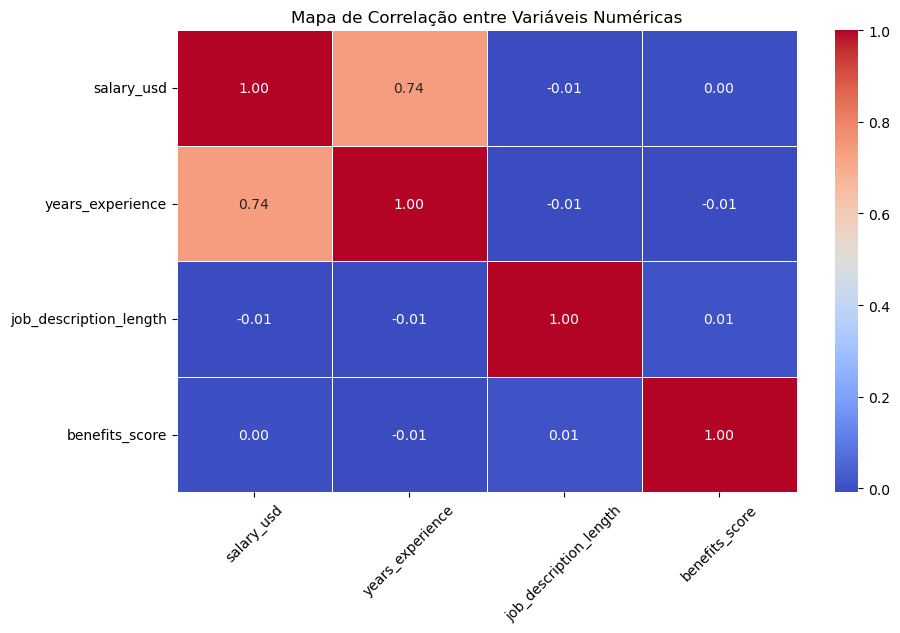

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleciona apenas colunas numéricas
df_numericas = df.select_dtypes(include=['int64', 'float64'])

# Calcula a matriz de correlação
matriz_corr = df_numericas.corr()

# Define o tamanho da figura
plt.figure(figsize=(10, 6))

# Cria o heatmap com anotações
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Título
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Resumo:
- Percebemos uma forte correlação entre Salário e Anos de Experiência, algo que já cogitávamos que fosse acontecer.
- Entretanto, os benefícios não acompanham essa mesma correlação, por exemplo, Salários altos não quer dizer que os benefícios também serão melhores

### 🔹 Gráfico de Dispersão (scatterplot)
Já que identificamos a correlação entre Salário e Anos de experiência, vamos usar o gráfico de dispersão (ou scatterplot), para entender melhor essa distribuição

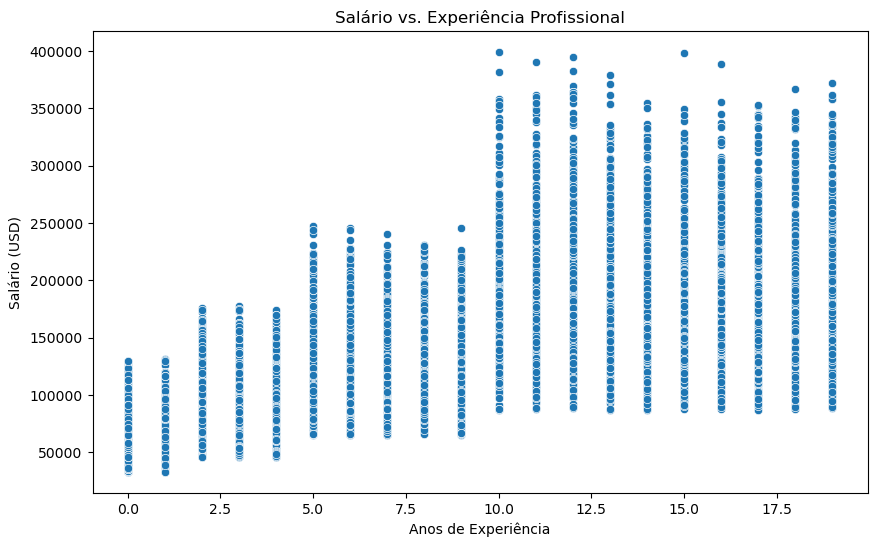

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='years_experience', y='salary_usd')
plt.title('Salário vs. Experiência Profissional')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário (USD)')
plt.show()

Resumo:
- Analisando os dados bem por cima (sem entrar no detalhe de área de atuação), percebmos que antes dos 10 anos de experiência, os salários não passavam dos 250k de dólares anuais.
- Somente a partir dos 10 anos que vemos os salários saltarem, chegando até os 400k anuais de dolares(embora seja um outlier)

### 🔹 Gráfico de Caixa (boxplot)
Já que identificamos a correlação entre Salário e Anos de experiência, vamos usar o gráfico de dispersão (ou scatterplot), para entender melhor essa distribuição

C:\Users\caioc\AppData\Local\Temp\ipykernel_3676\1391311530.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartis = df.groupby('experience_level')['salary_usd'].quantile([0.25, 0.5, 0.75]).unstack()


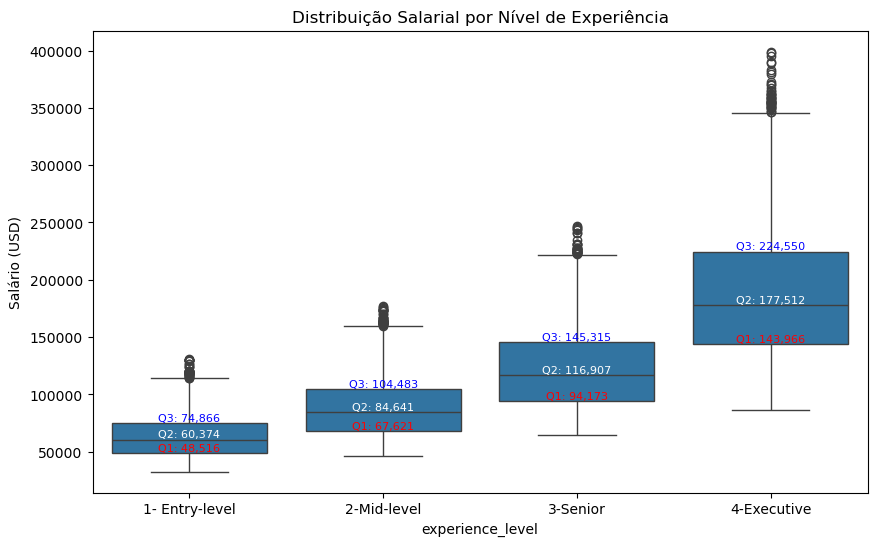

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='experience_level', y='salary_usd')

# Quartis por categoria
quartis = df.groupby('experience_level')['salary_usd'].quantile([0.25, 0.5, 0.75]).unstack()

# Adiciona as anotações no gráfico
for i, (cat, row) in enumerate(quartis.iterrows()):
    ax.text(i, row[0.25], f"Q1: {row[0.25]:,.0f}", color='red', ha='center', va='bottom', fontsize=8)
    ax.text(i, row[0.5], f"Q2: {row[0.5]:,.0f}", color='white', ha='center', va='bottom', fontsize=8)
    ax.text(i, row[0.75], f"Q3: {row[0.75]:,.0f}", color='blue', ha='center', va='bottom', fontsize=8)

plt.title("Distribuição Salarial por Nível de Experiência")
plt.ylabel("Salário (USD)")
plt.show()


Resumo:
- Analisando o boxplot, percebe-se que nos níveis mais baixos de experiência, os salários são mais concentrados. No caso do Entry-level, por exemplo, a maioria dos salários anuais está entre aproximadamente 50.000 e 75.000 USD. Existem algumas exceções que chegam perto de 100.000 USD, mas valores acima disso são considerados outliers.

- À medida que o nível de experiência aumenta, observamos uma expansão significativa do IQR, indicando maior variabilidade salarial. Esse padrão mostra que os salários ficam menos previsíveis e mais dependentes de fatores individuais como área de atuação, localização, e competências.

- Percebe-se uma leve assimetria positiva na distribuição salarial, com a mediana mais próxima do primeiro quartil (Q1) do que do terceiro (Q3), indicando que os salários estão mais concentrados nas faixas inferiores, enquanto os valores mais altos são mais dispersos e geram outliers acima da média

- No nível Executive, a variabilidade é claramente a maior de todas. A maior parte dos salários está entre 145.000 e 225.000 USD por ano, com uma mediana de aproximadamente 177.000 USD. Os bigodes superiores são mais longos, indicando que, mesmo sem considerar os outliers, os valores já se estendem bastante. Além disso, há uma concentração alta de outliers, com salários extrapolando os 225.000 USD e chegando próximo dos 400.000 USD anuais.

C:\Users\caioc\AppData\Local\Temp\ipykernel_3676\531661418.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


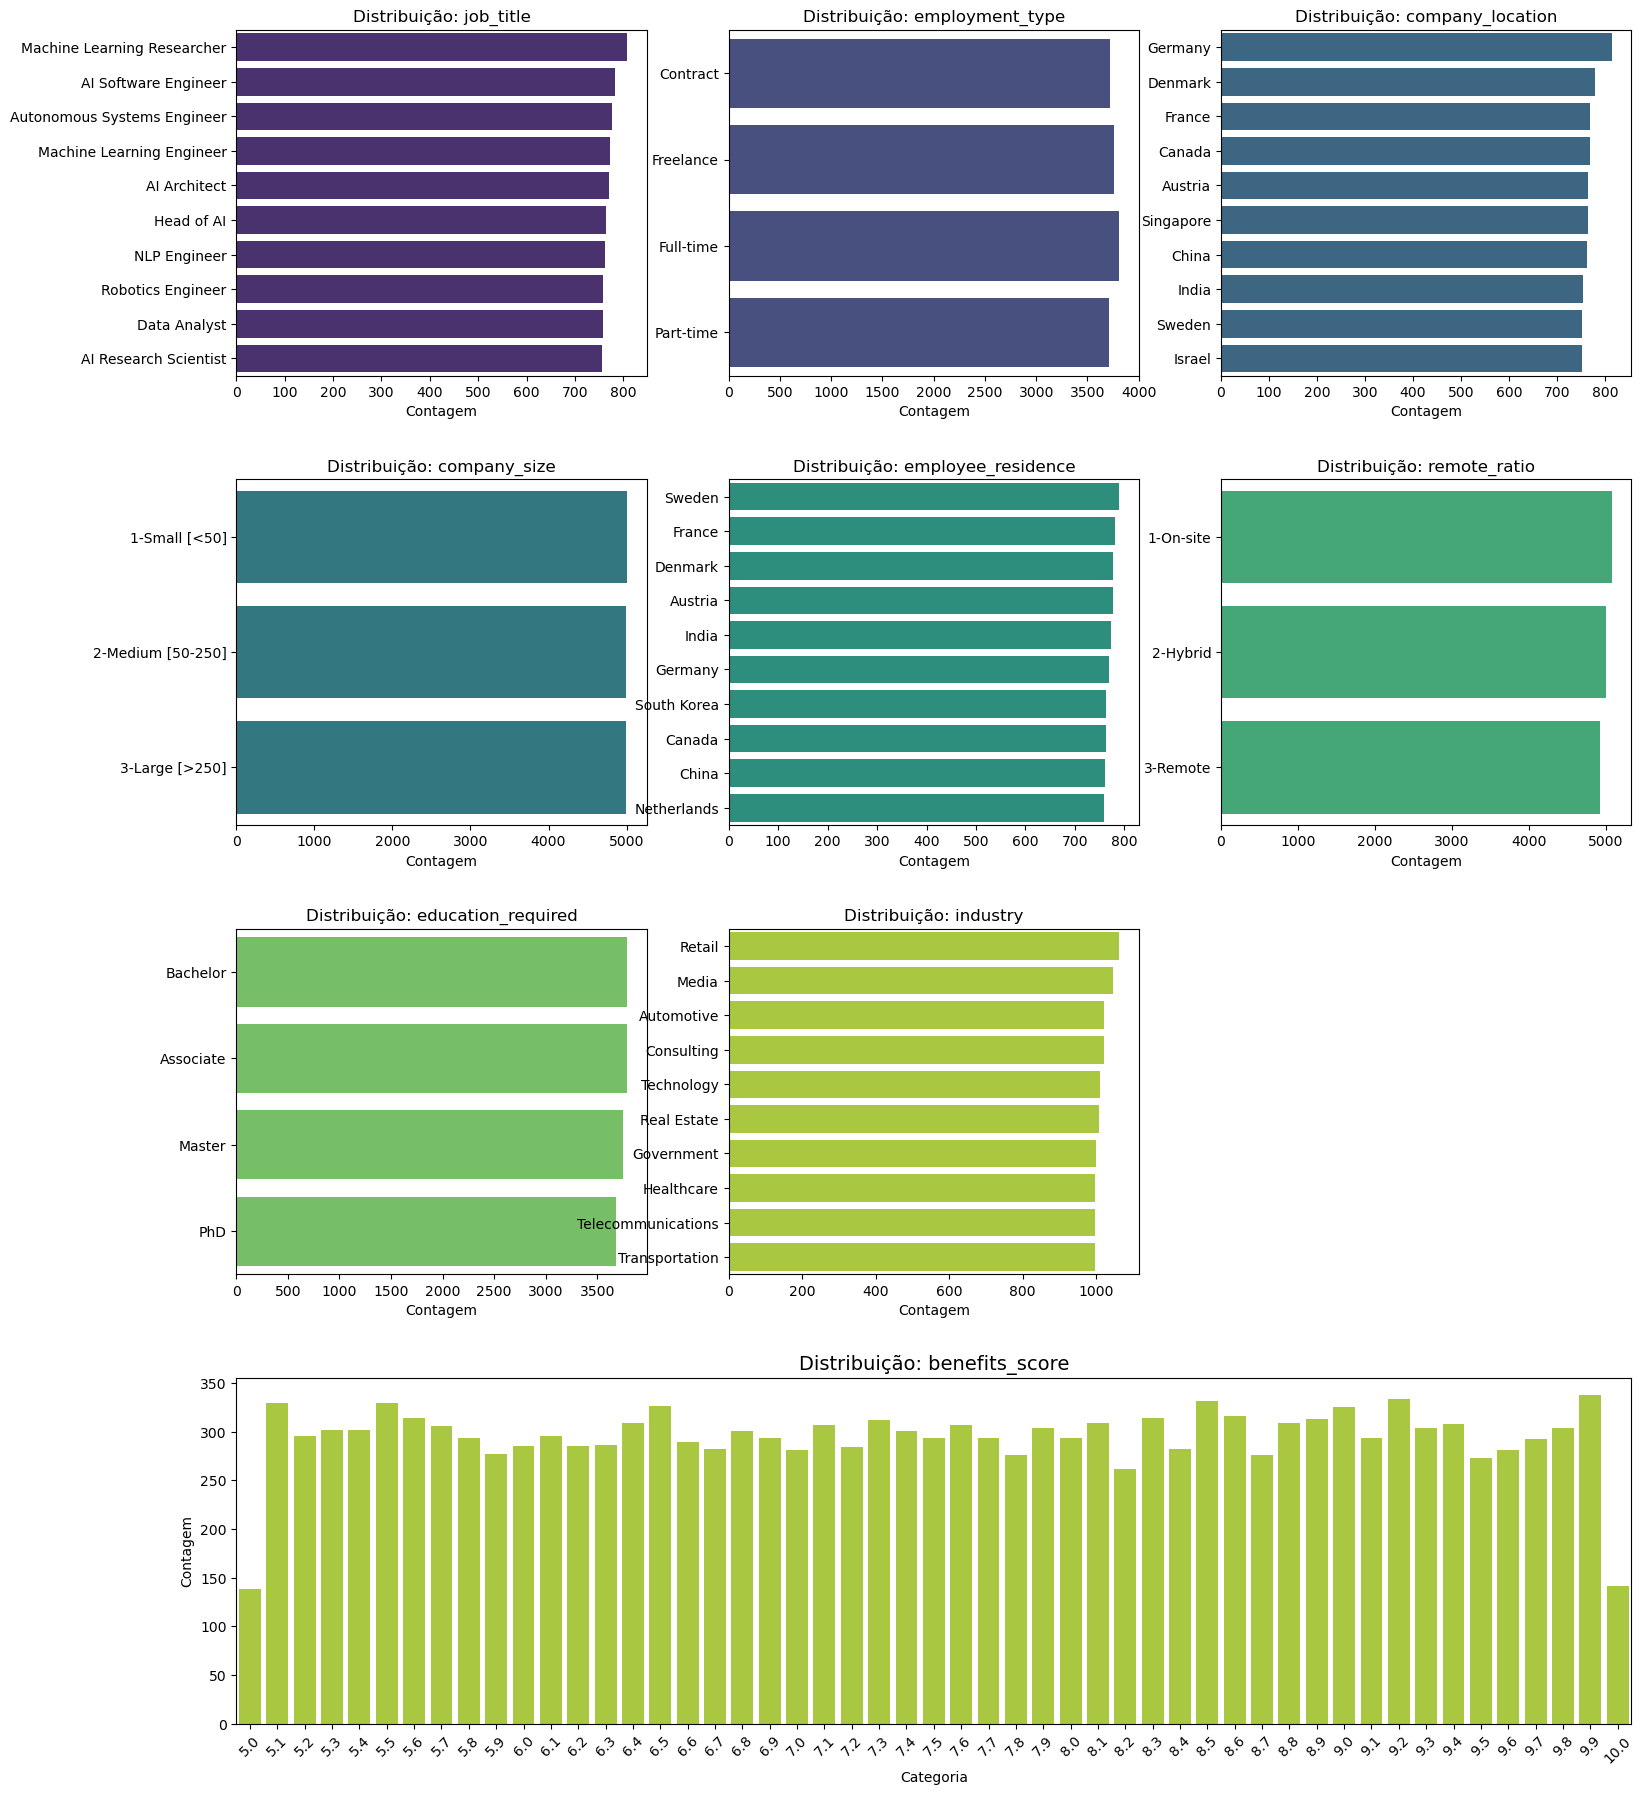

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from seaborn import color_palette


# Lista de colunas categóricas (benefits_score será tratado separado)
categorias = ['job_title', 'employment_type', 'company_location', 
              'company_size', 'employee_residence', 
              'remote_ratio', 'education_required', 'industry']

viridis = color_palette("viridis", len(categorias))

# Configura a grade: 4 linhas (a última será só para benefits_score), 3 colunas
fig = plt.figure(figsize=(18, 22))
gs = gridspec.GridSpec(4, 3, figure=fig)
gs.update(hspace=0.6)  # Espaçamento vertical

# Loop para os primeiros 8 gráficos (3x3 menos o último espaço)
for i, coluna in enumerate(categorias):
    ax = fig.add_subplot(gs[i // 3, i % 3])
    contagem = df[coluna].value_counts()
    sns.barplot(x=contagem.values, y=contagem.index, color=viridis[i], ax=ax)
    ax.set_title(f'Distribuição: {coluna}', fontsize=12)
    ax.set_xlabel('Contagem')
    ax.set_ylabel('')

# Gráfico do benefits_score ocupando a linha inteira (linha 3, colunas 0 até 2)
ax_big = fig.add_subplot(gs[3, :])  # Usa a linha inteira
contagem_benefits = df['benefits_score'].value_counts()
sns.barplot(x=contagem_benefits.index, y=contagem_benefits.values, color=viridis[i], ax=ax_big)
ax_big.set_title('Distribuição: benefits_score', fontsize=14)
ax_big.set_xlabel('Categoria')
ax_big.set_ylabel('Contagem')
ax_big.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


#### Resumo
- Após a visualização consolidada de todos os gráficos de barras, a primeira impressão é de que os dados estão bem distribuídos entre as categorias.
- Observamos uma boa variação entre os valores, sem a presença de categorias que dominam esmagadoramente os registros (ex: nenhuma com mais de 90% de ocorrência).

- Isso nos dá segurança para análises comparativas futuras, já que as categorias têm representatividade suficiente e não sofrem com viés por baixa amostragem.

- A única exceção foi a variável `benefits_score`, que apresentou um leve padrão de concentração nas pontas:

    - Algumas empresas atribuíram nota mínima (5.0), enquanto outras marcaram nota máxima (10.0).

    - Mesmo assim, a distribuição geral dos scores está relativamente próxima e equilibrada, sem grandes distorções.

C:\Users\caioc\AppData\Local\Temp\ipykernel_3676\1704294926.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='company_location', y='benefits_score', data=df, palette='pastel')


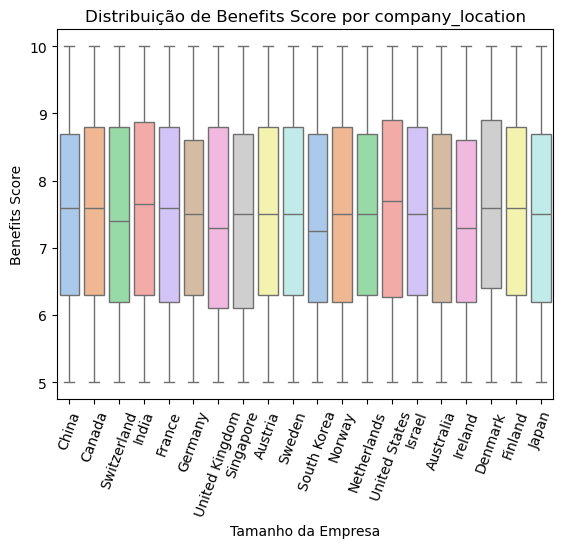

In [ ]:
sns.boxplot(x='company_location', y='benefits_score', data=df, palette='pastel')
plt.title('Distribuição de Benefits Score por company_location')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Benefits Score')
plt.tick_params(axis='x', rotation=70)
plt.show()

Resumo: 
- Olhando por cima os benefícios oferecios por Localidade das empresas, nenhuma se destaca fortemente em relação as outras.
- Há alguns outliers nas pontas (5.0 e 10.0), mas o padrão central gira entre 7 e 8.
- Aparentemente, o país da empresa não é um fator determinante isolado para o nível de benefícios.

## 🔶Tratamento final dos Dados
Nesse momento já temos uma certa noção do que iremos explorar nesse dataset. Podemos agora focar em fazer um "pente fino" nos dados, para deixá-lo pronto para análise final

### 🔸 Definição das Colunas do Dataset
Faremos a exclusão de algumas colunas desse dataset, para mantê-lo mais limpo.
Quais colunas serão excluídas:
- `job_id` → Coluna apenas de id, não há necessidade de mantê-la
- `salary_currency` → A coluna `salary_usd` já nos informa o salário convertido em Dolar anuais
- `application_deadline` → Esse prazo não traz nenhuma informação relevante.
- `job_description_length` → Essa coluna também não traz nenhuma informação que precisaremos
- `company_name` → Não precisaremos dos nomes para as análises tambem

In [22]:
df = df.drop(columns=['job_id', 'salary_currency', 'application_deadline', 'job_description_length', 'company_name'])

In [54]:
df.head(5)

,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,benefits_score
0,AI Research Scientist,90376,3-Senior,Contract,China,2-Medium [50-250],China,2-Hybrid,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,5.9
1,AI Software Engineer,61895,1- Entry-level,Contract,Canada,2-Medium [50-250],Ireland,3-Remote,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,5.2
2,AI Specialist,152626,2-Mid-level,Freelance,Switzerland,3-Large [>250],South Korea,1-On-site,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,9.4
3,NLP Engineer,80215,3-Senior,Freelance,India,2-Medium [50-250],India,2-Hybrid,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,8.6
4,AI Consultant,54624,1- Entry-level,Part-time,France,1-Small [<50],Singapore,3-Remote,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,6.6
